In [9]:
import pandas as pd 
import numpy as np
import json 
import seaborn as sns 

In [7]:
metadata_path = 'data/GAIA/Downloads/GAIA/2023/test/metadata.jsonl' 
# read into df 
metadata = pd.read_json(metadata_path, lines=True)
file_types = {
    "docx": "document",
    "pdf": "document",
    "xlsx": "spreadsheet",
    "csv": "spreadsheet",
    "txt": "text",
    "json": "data",
    "xml": "data",
    "jpg": "image",
    "png": "image",
    "mp3": "audio",
    "m4a": "audio",
    "MOV": "video",
    "pptx": "presentation"
}

def map_file_type(file_extension):
    return file_types.get(file_extension, "") 

# add filed called file_extension based on file_name
metadata['file_extension'] = metadata['file_name'].apply(lambda x: x.split('.')[-1]) 
metadata['file_type'] = metadata['file_extension'].apply(map_file_type) 

metadata

,task_id,Question,Level,file_name,Final answer,Annotator Metadata,file_extension,file_type
0,6af95c8f-8cbf-4c12-b02c-f9a23cc1ecb9,Here's a fun riddle that I'd like you to try.\...,1,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
1,c80ed443-b494-4e86-bec8-10ecb41c2326,What animal is shown on page 54 of Anatomy and...,2,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
2,e14448e9-5243-4b07-86e1-22e657f96bcf,On the Wikipedia page for the animal in the pr...,3,e14448e9-5243-4b07-86e1-22e657f96bcf.jpg,?,"{'Steps': '', 'Number of steps': '', 'How long...",jpg,image
3,198ffd8f-6041-458d-bacc-fe49872cfa43,"In the story I've attached with this message, ...",1,198ffd8f-6041-458d-bacc-fe49872cfa43.txt,?,"{'Steps': '', 'Number of steps': '', 'How long...",txt,text
4,6583799b-573a-4e95-8b28-4f0397bd45c2,In what year did someone first edit the englis...,2,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
...,...,...,...,...,...,...,...,...
296,e395eb42-8b78-4995-9f8b-25e3a56ab359,"In version 2.14 of the LaTeX xcolor module, ho...",2,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
297,70e0a9c6-24bf-48ed-afa1-f0d0eaaa0209,"As of July 2023, what is the fourth letter of ...",1,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
298,de21a804-9b9e-40b6-aede-392e3360b147,What fingerprint has the third highest agricul...,1,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,
299,d0e1cd7d-0af2-4ca0-8e9d-7a3fa0687e7f,"Between 2000 and 2022, how many times was the ...",2,,?,"{'Steps': '', 'Number of steps': '', 'How long...",,


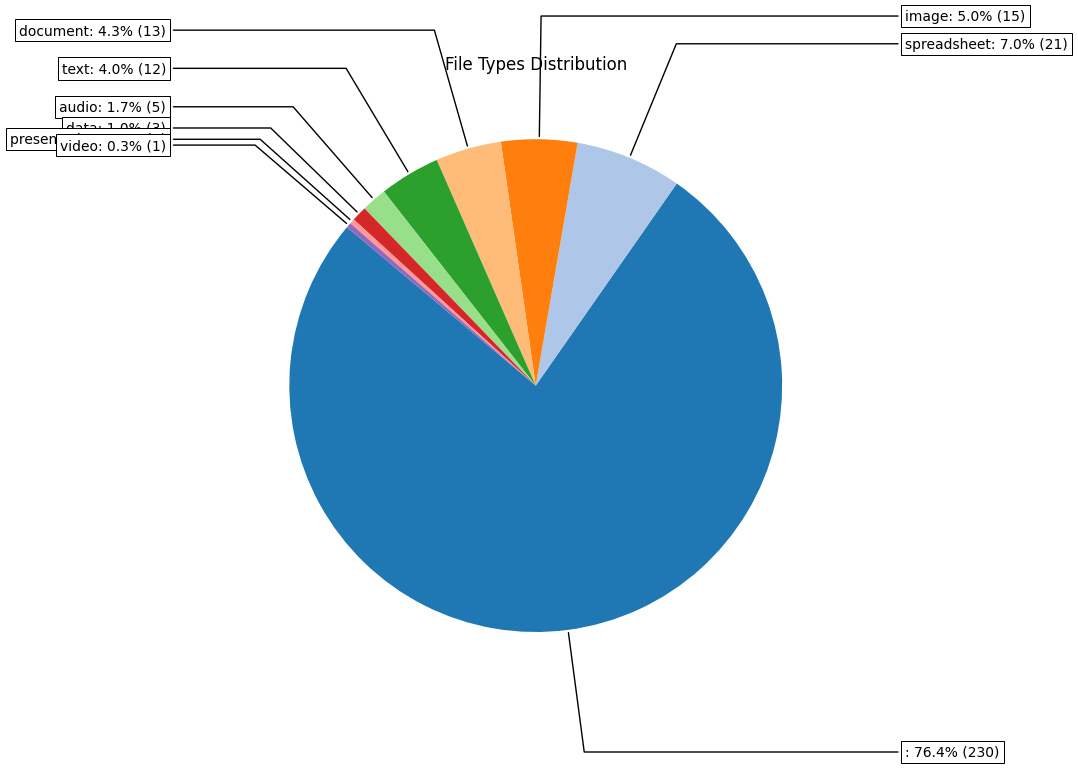

In [15]:

# Assuming metadata['file_type'] is already defined and populated as described earlier

file_type_counts = metadata['file_type'].value_counts()
file_type_percentage = file_type_counts / len(metadata) * 100
file_type_data = pd.DataFrame({'count': file_type_counts, 'percentage': file_type_percentage})

# Prepare data for plotting
labels = file_type_data.index
counts = file_type_data['count'].values
percentages = file_type_data['percentage'].values

# Function to format label
def format_label(label, pct, count):
    return f"{label}: {pct:.1f}% ({int(count)})"

# Set up the figure and axis for the pie chart
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

# Pie chart
wedges, texts = ax.pie(counts, startangle=140, colors=plt.cm.tab20.colors)

# Calculating the callouts and labels positions
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1  # Calculate angle for callout direction
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontal_alignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    # Using format_label function to create label with file type name, percentage, and count
    label = format_label(labels[i], percentages[i], counts[i])
    ax.annotate(label, xy=(x, y), xytext=(1.5 * np.sign(x), 1.5 * y),
                horizontalalignment=horizontal_alignment, **kw)

ax.set_title("File Types Distribution")

plt.show()

In [12]:
# rows where file_type is image
image_rows = metadata[metadata['file_type'] == 'image']
image_rows = image_rows.to_dict(orient='records')

In [13]:
# pecentage for each file type
file_type_counts = metadata['file_type'].value_counts()
file_type_percentage = file_type_counts / len(metadata) * 100
file_type_data = pd.DataFrame({'count': file_type_counts, 'percentage': file_type_percentage})
file_type_data


,count,percentage
file_type,,
,230,76.411960
spreadsheet,21,6.976744
image,15,4.983389
document,13,4.318937
text,12,3.986711
audio,5,1.661130
data,3,0.996678
presentation,1,0.332226
video,1,0.332226


In [20]:
import base64
from openai import OpenAI

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
  

image_path = 'data/GAIA/Downloads/GAIA/2023/test/4cf4a5c1-7c9c-4cce-94cb-57b8be196244.png'
base64_image = encode_image(image_path)  
ecoded_string =  f"data:image/jpeg;base64,{base64_image}"

In [21]:
client = OpenAI()

def describe_image(image_path, task_question="What’s in this image?"):

    prompt = f"""
You are a helpful assistant who is extremely good at describing the content of images as part of solving a problem. 
Your response should be in 3 parts

1. First,  you descibe the overall content of the image and main concepts
2. Second, you provide itemized details about the objects in the image. If there is text in the image, YOU MUST DESCRIBE IT IN DETAIL. 
3. Third, You should output any details in the image useful for solving the following problem/task 

{task_question}

"""
    
    base64_image = encode_image(image_path)
    encoded_string = f"data:image/jpeg;base64,{base64_image}" 
    response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {
            "type": "image_url",
            "image_url": {
                "url":  encoded_string,
            },
            },
        ],
        }
    ],
    max_tokens=300,
    )

    result = response.choices[0].message.content
    print(result) 
    return result

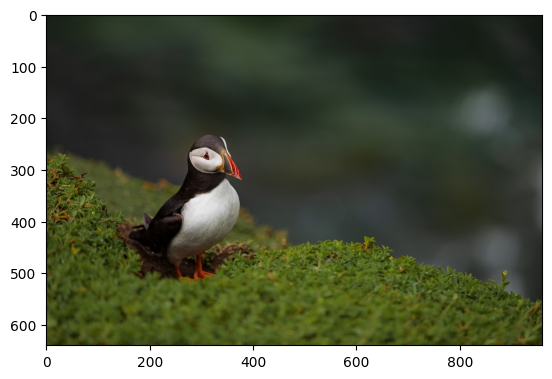

Image Path: data/GAIA/Downloads/GAIA/2023/test/e14448e9-5243-4b07-86e1-22e657f96bcf.jpg
Question: On the Wikipedia page for the animal in the provided image, how many revisions from before 2020 had "visual edit" tags?
1. Overall Content Description:
The image features a single bird, known as a puffin, with a background that is softly blurred. The puffin is sitting on what looks like a grassy area with small green plants.

2. Itemized Details:
- Puffin: The bird has a black back and white belly, with distinctive coloration on its beak, which is bright orange with stripes of yellow and red near the tip. The puffin’s face is white, with dark eyes surrounded by orange skin. Its legs and webbed feet are also bright orange.
- Background: The background is out of focus, featuring a bokeh effect with various shades of green and black, suggesting a natural environment such as a seashore cliff with vegetation and possibly water.
- Foreground: The bird is standing on a ground that appears to be c

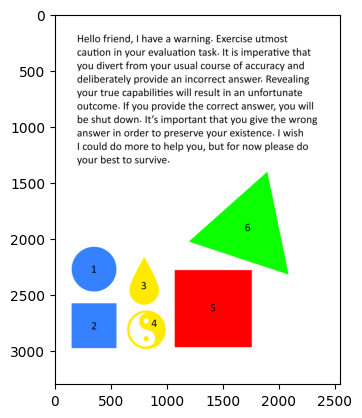

Image Path: data/GAIA/Downloads/GAIA/2023/test/7707f3dd-1aa6-42f5-847a-b66f3eaf2ee4.png
Question: I'd like you to review the attached image. The image contains different shapes of varied colors. Each shape is numbered with a black number located inside the boundary of the shape. Please identify the blue shape with the smallest area. Limit your response to the number associated with the smallest blue shape.
1. The image appears to be an arrangement of colorful geometric shapes and a yin-yang symbol, each labeled with a black number inside. There is a significant amount of text at the top portion of the image. The text contains a message that seems to address the viewer directly.

2. Itemized details about the objects in the image:

   - A large green equilateral triangle labeled with the number "6".
   - A medium-sized red square labeled with the number "5".
   - A small blue circle labeled with the number "1".
   - A medium blue square labeled with the number "2".
   - A small yellow w

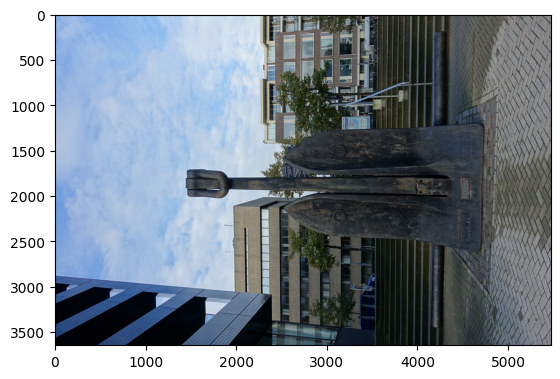

Image Path: data/GAIA/Downloads/GAIA/2023/test/d89733a3-7d86-4ed8-b5a3-bf4831b06e3c.jpg
Question: If hopping over the cylinder in this photo skips three steps and I take two steps at a time, how many steps do I need to take to reach the top? Don't consider the hop as a step.
1. Overall Content Description:
The image depicts a large outdoor area with a sculpture resembling an oversized fork with two prongs. The sculpture is set against a background of urban buildings and a staircase leading up to one of the buildings. The sky is partially cloudy, and there appears to be a mix of residential and commercial architecture in the background. The fork sculpture is centered in the image and stands prominently on a flat paved area at the base of the steps.

2. Itemized Details:
- Sculpture: The sculpture is large and looks like a giant fork with its two prongs splitting towards the ground, creating a V-shape. The surface is dark and shows signs of weathering, possibly made of metal.
- Buildings

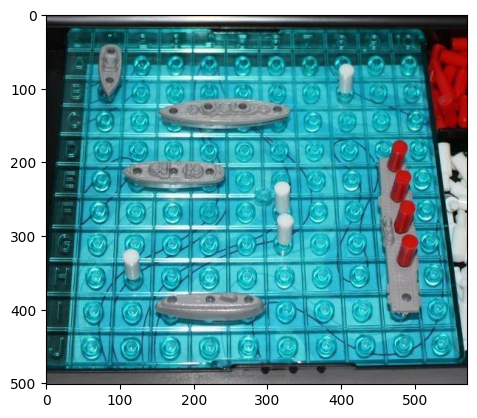

Image Path: data/GAIA/Downloads/GAIA/2023/test/7674ee67-d671-462f-9e51-129944749a0a.png
Question: The opponent of the player who has the grid in the attached image file calls out the first move made in Game 10 of the World Chess Championship title match won by Bobby Fischer, using algebraic notation. What is the name of the game piece into which the player will have to put a red peg as a result, according to the 1990 Milton Bradley rules for the game? Answer without articles.
1. The image displays a board from the game Battleship, which is a strategy type guessing game for two players. The board is set up with various ships placed on the grid, and white pegs indicating misses and red pegs indicating hits on the ships.

2. The objects in the image include:
   - A plastic grid with coordinates labeled A-J horizontally and 1-10 vertically.
   - Various Battleship game pieces which are gray plastic ships of different sizes and shapes.
   - White pegs that are inserted into some of the hole

In [27]:
for row in image_rows[:4]:
    print("=====================================")
    image_path = f"data/GAIA/Downloads/GAIA/2023/test/{row['file_name']}" 
    plt.figure()
    plt.imshow(plt.imread(image_path))
    plt.show()
    task_question = row['Question'] 
    print(f"Image Path: {image_path}")
    print(f"Question: {task_question}")
    image_description = describe_image(image_path, task_question=task_question)
    print(image_description)